#### Tugas 1 - Machine Learning

#### Kelompok 9

#### Anggota Kelompok:
1. **2208107010012** Fazhira Rizky Harmayani
2. **2208107010027** Cut Dahliana
3. **2208107010043** Naufal Aqil
4. **2208107010063** Hidayat Nur Hakim
5. **2208107010086** Riska Haqika Situmorang

#### Deskripsi Tugas
Tugas ini merupakan tugas pertama dalam mata kuliah Machine Learning. Setiap kelompok bekerja dengan dataset dari sumber open source seperti Kaggle atau Hugging Face. Tujuan utama tugas ini adalah memahami proses persiapan data sebelum digunakan dalam analisis atau pelatihan model machine learning.

Kelompok 9 memilih dataset dari Kaggle yang dapat diakses melalui link berikut: [PRSA Data Aotizhongxin (2013-2017)](https://www.kaggle.com/datasets/shaviranurfadhilla/prsa-data-aotizhongxin-2013-2017).

**Kelompok 9 - Machine Learning 2025**

####  Import Libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


Penjelasan <br>
Kode ini menggunakan beberapa library penting untuk analisis dan pemrosesan data. Pandas digunakan untuk manipulasi data, sementara NumPy membantu dalam perhitungan numerik seperti kuartil untuk deteksi outlier. Matplotlib dan Seaborn digunakan untuk visualisasi data, seperti membuat boxplot untuk mendeteksi outlier. Terakhir, MinMaxScaler dari Scikit-learn digunakan untuk normalisasi data agar berada dalam rentang 0 hingga 1, sehingga memudahkan analisis lebih lanjut atau penerapan dalam model machine learning.

#### Tahap Preprocessing Data

##### Mengekstrak dan Membaca Data

In [2]:
# Memuat dataset
df = pd.read_csv("./data/PRSA_Data_Aotizhongxin.csv")

Penjelasan<br>
Proses mengekstrak dan membaca data akan dilakukan dengan menggunakan library pandas. Data yang akan digunakan adalah data berjenis csv. Kode diatas adalah syntax untuk memanggil data dari file berjenis csv.

In [6]:
print(df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


##### Korelasi Antar Fitur

In [7]:
# Simpan kolom non-numerik ke variabel terpisah
df_categorical = df[['wd', 'station']].copy()
# Pisahkan hanya kolom numerik untuk analisis korelasi
df_numeric = df.select_dtypes(include=['number'])

Penjelasan <br>
Kode berikut bertujuan untuk memastikan bahwa hanya fitur numerik yang digunakan dalam analisis korelasi, karena metode korelasi seperti Pearson hanya berlaku untuk data numerik. df_categorical meyimpan kolom 'wd' dan 'station' agar tidak ikut dalam perhitungan korelasi. df_numeric berisi hanya fitur numerik dari dataset, yang akan digunakan dalam perhitungan korelasi antar fitur.

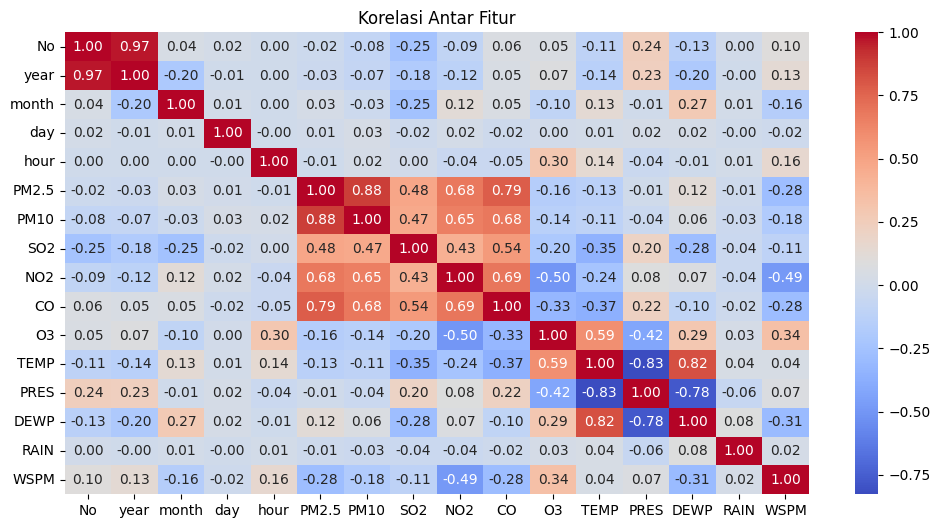

In [8]:
# Hitung korelasi antar fitur numerik
correlation_matrix = df_numeric.corr(method='pearson')

# Tampilkan heatmap korelasi
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

# Jika ingin menggabungkan kembali setelah analisis, gunakan:
df_final = pd.concat([df_numeric, df_categorical], axis=1)

Penjelasan <br>
Heatmap korelasi yang menunjukkan hubungan antara berbagai fitur numerik dalam dataset. Warna dalam heatmap ini mencerminkan seberapa kuat hubungan antara satu fitur dengan fitur lainnya, dengan nilai korelasi berkisar antara -1 hingga 1.<br>
Dari heatmap ini, terlihat bahwa ada beberapa fitur yang memiliki korelasi tinggi. Misalnya, kadar PM2.5 dan PM10 memiliki korelasi sebesar 0.88, yang berarti jika kadar PM2.5 meningkat, kadar PM10 juga cenderung meningkat. Demikian pula, kadar karbon monoksida (CO) dan nitrogen dioksida (NO2) menunjukkan hubungan yang cukup erat dengan korelasi sebesar 0.69. Hal ini mengindikasikan bahwa polutan tersebut sering ditemukan bersama di udara, mungkin karena berasal dari sumber yang sama seperti emisi kendaraan atau industri.<br>
Selain korelasi positif, terdapat juga korelasi negatif yang signifikan. Misalnya, tekanan udara (PRES) dan suhu udara (TEMP) memiliki korelasi sebesar -0.83, yang berarti ketika tekanan udara tinggi, suhu cenderung lebih rendah.<br>
Namun, ada juga fitur-fitur yang tidak memiliki hubungan yang kuat satu sama lain. Sebagai contoh, hubungan antara bulan dalam setahun dan kadar NO2 memiliki korelasi sebesar -0.12, yang menunjukkan bahwa faktor musiman mungkin tidak terlalu berpengaruh pada tingkat polusi ini. Begitu pula hubungan antara waktu dalam sehari dengan kadar PM2.5 yang hanya memiliki korelasi 0.01, mengindikasikan bahwa variasi harian mungkin tidak terlalu berdampak pada kadar partikel tersebut.<br>



#####  Menampilkan Informasi Dataset &  Mengecek Missing Value

In [11]:
# Menampilkan informasi dasar dataset
print(df_numeric.info())

# Mengecek jumlah nilai kosong
print(df_numeric.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      35064 non-null  int64  
 1   year    35064 non-null  int64  
 2   month   35064 non-null  int64  
 3   day     35064 non-null  int64  
 4   hour    35064 non-null  int64  
 5   PM2.5   34139 non-null  float64
 6   PM10    34346 non-null  float64
 7   SO2     34129 non-null  float64
 8   NO2     34041 non-null  float64
 9   CO      33288 non-null  float64
 10  O3      33345 non-null  float64
 11  TEMP    35044 non-null  float64
 12  PRES    35044 non-null  float64
 13  DEWP    35044 non-null  float64
 14  RAIN    35044 non-null  float64
 15  WSPM    35050 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 4.3 MB
None
No          0
year        0
month       0
day         0
hour        0
PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
P

Penjelasan <br>
Code di atas untuk mengecek informasi dataset dan juga mengecek missing values dapat dilihat berdasarkan ouput itu bahwa dataset 35.064 & 16 kolom. Pada Dataset ini terdapat beberapa missing values terutama pada kolom polutan udara (PM2.5, PM10, SO2, NO2, CO, O3) Beberapa kolom memeiliki jumlah missing values yang realtif kecil seperti WSPM

#####  Menangani Missing Value

In [28]:
# Kolom dengan missing values kecil (<100) diimputasi (mengisi)
# Mengisi kolom numerik dengan median tanpa inplace
df_numeric['WSPM'] = df_numeric['WSPM'].fillna(df_numeric['WSPM'].median())


# Disarankan untuk diimputasi dengan median atau interpolasi, karena data polutan udara biasanya memiliki outlier. 
# Mengisi kolom dengan missing values sedang menggunakan median
cols_with_median = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']
df_numeric[cols_with_median] = df_numeric[cols_with_median].apply(lambda x: x.fillna(x.median()))

# Mengecek kembali jumlah missing values setelah imputasi
print("Missing values setelah penanganan:")
print(df_numeric.isnull().sum())

Missing values setelah penanganan:
No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64


Penjelasan Bagaimana Menangani Missing Value<br>

Kategori Missing Values:<br>
- Jumlah kecil (< 100) →  WSPM (14)<br>
- Jumlah sedang (100 - 2000) → PM2.5 (925), PM10 (718), SO2 (935), NO2 (1023), O3 (1719)<br>
- Jumlah besar (> 2000) → CO (1776)<br>

Jika missing values kecil (<1% dari total data), imputasi lebih disarankan. Jika banyak (>5-10%), perlu dipertimbangkan apakah dihapus atau diimputasi.<br>

Metode Pengisian Missing Values:<br>
1. Mode untuk Data Kategorikal<br>
   - Kolom wd (arah angin) → diisi dengan mode (nilai paling sering muncul) agar tetap konsisten.<br>
2. Median untuk Data Numerik<br>
   - Kolom WSPM (kecepatan angin) → diisi dengan median, lebih tahan terhadap outlier.<br>
   - Kolom PM2.5, PM10, SO2, dll. → diisi dengan median agar lebih stabil.<br>

Kenapa Kolom CO Tidak Dihapus?<br>
1. Kehilangan Data Jika Dihapus<br>
   - Missing values CO = 17,76% (1.776 dari 35.064 baris).<br>
   - Jika dihapus, informasi dari kolom lain juga akan hilang.<br>
   - Solusi: Lebih baik diimputasi daripada dihapus.<br>
2. Kenapa Menggunakan Median?<br>
   - Alternatif imputasi:<br>
     - Mean (Rata-rata) → Tidak cocok karena rentan terhadap outlier.<br>
     - Median (Nilai Tengah) → Lebih robust dan stabil.<br>
   - Kesimpulan: Median lebih cocok untuk CO dibandingkan mean.<br>
3. Kapan Kolom Sebaiknya Dihapus?<br>
   - Jika missing values > 40-50%, kolom lebih baik dihapus.<br>
   - Jika hanya 17,76%, masih layak diimputasi.<br>

Kesimpulan Akhir:<br>
- Mode untuk wd agar tetap konsisten.<br>
- Median untuk WSPM, CO, dll. agar lebih tahan terhadap outlier.<br>
- Kolom CO tidak dihapus karena masih memiliki 82% data.<br>
- Jika missing values > 50%, baru dipertimbangkan untuk dihapus.<br>
#####  Mengecek Data Duplikat

In [29]:
df_numeric.duplicated().sum()

0

Penjelasan <br>
Dapat dilihat untuk dataset tersebut tidak terdapat data duplikat

#####  Normalisasi Data

In [17]:
# Inisialisasi scaler untuk masing-masing dataset
scaler = MinMaxScaler()

# Daftar kolom numerik yang akan dinormalisasi
num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Normalisasi dataset train (fit dan transform di train)
df_numeric[num_cols] = scaler.fit_transform(df_numeric[num_cols])

Penjelasan <br>
Normalisasi diperlukan karena dataset memiliki variabel dengan skala berbeda (misalnya, konsentrasi polutan dalam µg/m³, suhu dalam °C, dan tekanan dalam hPa), yang dapat menyebabkan algoritma machine learning lebih condong ke fitur dengan nilai besar. Selain itu, normalisasi meningkatkan performa model dengan memastikan semua fitur berada dalam rentang yang sama, mempercepat konvergensi, dan menghindari bias dalam algoritma berbasis jarak seperti KNN dan SVM.

#####  Mendektesi Outlier

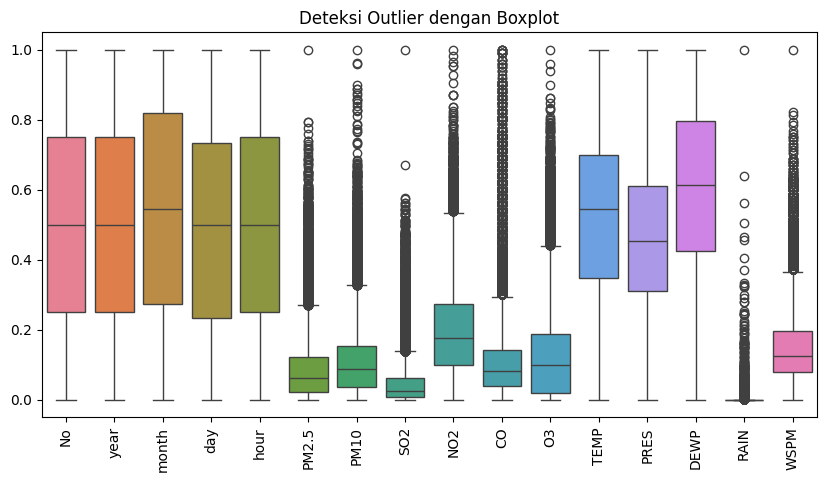

In [18]:
# Visualisasi boxplot untuk semua kolom numerik
plt.figure(figsize=(10,5))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)  # Rotasi label agar lebih mudah dibaca
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

In [19]:
# Daftar kolom yang akan dicek outliernya
outlier_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "RAIN", "WSPM"]

# Fungsi untuk menghitung jumlah outlier
def count_outliers_iqr(df_numeric, cols):
    outlier_counts = {}
    for col in cols:
        Q1 = np.quantile(df_numeric[col], 0.25)
        Q3 = np.quantile(df_numeric[col], 0.75)
        IQR = Q3 - Q1
        min_IQR = Q1 - 1.5 * IQR
        max_IQR = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outliers = df_numeric[(df_numeric[col] < min_IQR) | (df_numeric[col] > max_IQR)]
        outlier_counts[col] = len(outliers)
    
    return outlier_counts

# Hitung jumlah outlier pada dataset
outlier_counts = count_outliers_iqr(df_numeric, outlier_cols)
print(outlier_counts)


{'PM2.5': 1768, 'PM10': 1162, 'SO2': 3167, 'NO2': 566, 'CO': 2607, 'O3': 1491, 'RAIN': 1380, 'WSPM': 1742}


In [21]:
total_data = len(df_numeric)
outlier_counts = {'PM2.5': 1768, 'PM10': 1162, 'SO2': 3167, 'NO2': 566, 'CO': 2607, 'O3': 1491, 'RAIN': 1380, 'WSPM': 1742}

for col, count in outlier_counts.items():
    percentage = (count / total_data) * 100
    print(f"{col}: {count} outliers ({percentage:.2f}%)")


PM2.5: 1768 outliers (5.04%)
PM10: 1162 outliers (3.31%)
SO2: 3167 outliers (9.03%)
NO2: 566 outliers (1.61%)
CO: 2607 outliers (7.43%)
O3: 1491 outliers (4.25%)
RAIN: 1380 outliers (3.94%)
WSPM: 1742 outliers (4.97%)


Kategori Outlier Berdasarkan Persentase
Sedikit (<5%) → Bisa dihapus langsung:
- PM10 (3.31%)
- NO2 (1.61%)
- O3 (4.25%)
- RAIN (3.94%)
- WSPM (4.97%)

Sedang (5-10%) → Perlu dipertimbangkan (hapus atau imputasi):
- PM2.5 (5.04%)
- SO2 (9.03%)
- CO (7.43%)



In [22]:
def cap_outliers(df_numeric, columns):
    for column in columns:
        Q1 = df_numeric[column].quantile(0.25)
        Q3 = df_numeric[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Ganti nilai outlier dengan batas bawah dan atas
        df_numeric[column] = df_numeric[column].clip(lower=lower_bound, upper=upper_bound)

    return df_numeric

# Kolom numerik yang mengandung outlier
feature_num = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']

# Menangani outlier dengan metode capping
df_numeric = cap_outliers(df_numeric, feature_num)


Penjelasan<br>
Capping (pemotongan outlier) menggunakan metode Interquartile Range (IQR).
1. Menghitung Q1 dan Q3

   - Q1 (kuartil pertama): Nilai persentil ke-25 dari data.
   - Q3 (kuartil ketiga): Nilai persentil ke-75 dari data.
   - IQR (Interquartile Range): Rentang antara Q1 dan Q3.

2. Menentukan batas bawah dan atas menggunakan rumus:

   $$
   \text{Lower Bound} = Q1 - 1.5 \times IQR
   $$

   $$
   \text{Upper Bound} = Q3 + 1.5 \times IQR
   $$

3. Mengganti nilai yang berada di luar batas tersebut dengan batas bawah atau batas atas menggunakan fungsi `clip()`:

   ```python
   df_numeric[column] = df_numeric[column].clip(lower=lower_bound, upper=upper_bound)
   ```
kode ini mengatasi outlier dengan menggantinya ke nilai yang masih dalam batas wajar. Dengan metode ini, distribusi data tetap lebih stabil dibandingkan dengan:
- Menghapus data yang memiliki outlier (yang bisa menyebabkan kehilangan informasi).
- Melakukan imputasi dengan nilai rata-rata atau median.

Jika ingin mempertahankan outlier dalam kategori sedang (5-10%) untuk diimputasi alih-alih dicapping, kode bisa dimodifikasi agar hanya menerapkan metode ini pada kategori sedikit (<5%) dan menggunakan pendekatan lain seperti mean/median untuk kategori sedang (5-10%).

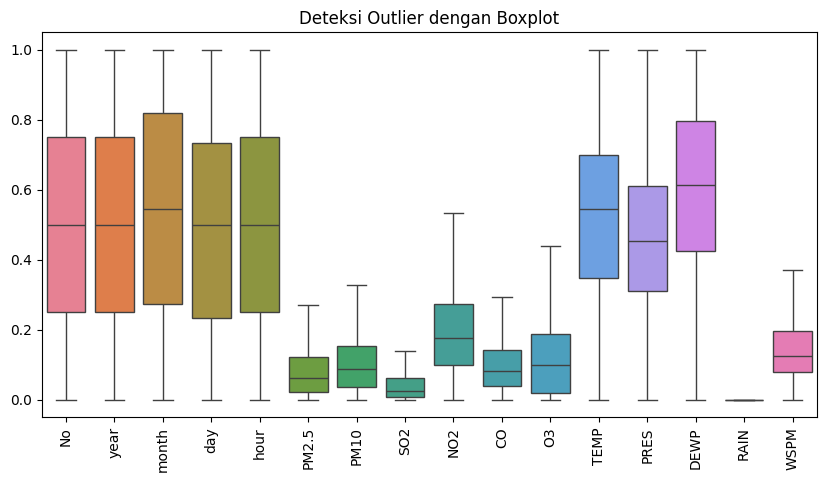

In [23]:
# Visualisasi boxplot untuk semua kolom numerik
plt.figure(figsize=(10,5))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)  # Rotasi label agar lebih mudah dibaca
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

In [24]:
# Daftar kolom yang akan dicek outliernya
outlier_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "RAIN", "WSPM"]

# Fungsi untuk menghitung jumlah outlier
def count_outliers_iqr(df_numeric, cols):
    outlier_counts = {}
    for col in cols:
        Q1 = np.quantile(df_numeric[col], 0.25)
        Q3 = np.quantile(df_numeric[col], 0.75)
        IQR = Q3 - Q1
        min_IQR = Q1 - 1.5 * IQR
        max_IQR = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outliers = df_numeric[(df_numeric[col] < min_IQR) | (df_numeric[col] > max_IQR)]
        outlier_counts[col] = len(outliers)
    
    return outlier_counts

# Hitung jumlah outlier pada dataset
outlier_counts = count_outliers_iqr(df_numeric, outlier_cols)
print(outlier_counts)


{'PM2.5': 0, 'PM10': 0, 'SO2': 0, 'NO2': 0, 'CO': 0, 'O3': 0, 'RAIN': 0, 'WSPM': 0}


Penjelasan <br>
Setelah dilakukan penanganan outlier menggunakan metode capping dengan IQR, hasil analisis menunjukkan bahwa jumlah outlier dalam dataset untuk semua kolom yang dicek (PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM) menjadi nol.  

Hal ini berarti bahwa semua nilai yang sebelumnya dianggap sebagai outlier telah berhasil dikonversi ke dalam rentang yang wajar berdasarkan batas bawah (Q1 - 1.5 × IQR) dan batas atas (Q3 + 1.5 × IQR). Dengan kata lain, tidak ada lagi data yang berada di luar batas yang ditentukan.  

Dengan metode ini, distribusi data tetap lebih stabil dibandingkan dengan menghapus outlier secara langsung, sehingga dataset tetap dapat digunakan untuk analisis lebih lanjut tanpa kehilangan informasi yang signifikan.